In [ ]:
pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=37a4bd39a5490b7e6252fd7ef720718582dc040ce2bc028f00e3cb865ba57691
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import import_ipynb
import DataPrep_CNN as dp
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

importing Jupyter notebook from DataPrep_CNN.ipynb
Mounted at /content/gdrive


In [ ]:
trainImages = dp.trainDataset()
valImages = dp.valDataset()

torch.save(trainImages, 'trainImages_vae.pt')
torch.save(valImages, 'valImages_vae.pt')

In [ ]:
trainImages_2 = torch.load('trainImages_vae.pt')
valImages_2 = torch.load('valImages_vae.pt')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


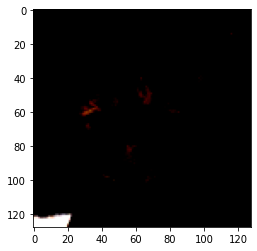

In [ ]:
class_names = ['dog', 'nondog']
img, label = trainImages_2[9400]
plt.imshow(img.permute(1,2,0))

In [ ]:
#Create simple CNN model
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
 
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))

In [ ]:
train_loader = DataLoader(trainImages, batch_size=64, shuffle=True)
 
model = CNN()  #
optimizer = optim.SGD(model.parameters(), lr=1e-2)  #
loss_fn = nn.CrossEntropyLoss()  #
 
training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2020-11-03 21:21:43.818429 Epoch 1, Training loss 0.6531871103200336
2020-11-03 21:22:17.535418 Epoch 10, Training loss 0.16447485213311727
2020-11-03 21:22:54.552682 Epoch 20, Training loss 0.11195729840421836
2020-11-03 21:23:31.601157 Epoch 30, Training loss 0.0922888299550286
2020-11-03 21:24:08.467605 Epoch 40, Training loss 0.0741483086232571
2020-11-03 21:24:45.619781 Epoch 50, Training loss 0.06256439110526703
2020-11-03 21:25:22.489379 Epoch 60, Training loss 0.06150282808050557
2020-11-03 21:25:59.314494 Epoch 70, Training loss 0.06479497704125203
2020-11-03 21:26:36.099126 Epoch 80, Training loss 0.039147194443683093
2020-11-03 21:27:12.998663 Epoch 90, Training loss 0.03107018855981679
2020-11-03 21:27:49.713816 Epoch 100, Training loss 0.027124042039496463


In [ ]:
train_loader = DataLoader(trainImages, batch_size=64,shuffle=False)
val_loader = DataLoader(valImages, batch_size=64, shuffle=False)
 
def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0
 
        with torch.no_grad():
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
 
        print("Accuracy {}: {:.2f}".format(name , correct / total))
 
validate(model, train_loader, val_loader)

Accuracy train: 0.99
Accuracy val: 0.96


In [ ]:
#Plot the training loss graph

trainloss = loss.detach().numpy()
epochs = range(35)
plt.plot(epochs, trainloss, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()